<a href="https://colab.research.google.com/github/pachterlab/COVID-19-testing-database/blob/master/notebooks/basic_stats.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget --output-file="logs.csv" "https://docs.google.com/spreadsheets/d/10I8bVkLzvrmXJsb5N-8JSFpWw5vBwDKYzyOVAI4viKo/export?format=csv&gid=1514440859" -O "sheet.csv"

In [2]:
!awk 'NR>4' sheet.csv > data.csv

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

def nd(arr):
  return np.asarray(arr).reshape(-1)

def yex(ax):
    lims = [
        np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
        np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
    ]
    
    # now plot both limits against eachother
    ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    ax.set_aspect('equal')
    ax.set_xlim(lims)
    ax.set_ylim(lims)
    return ax

fsize=20

plt.rcParams.update({'font.size': fsize})
%config InlineBackend.figure_format = 'retina'

In [4]:
df = pd.read_csv("data.csv")
df.index = df.institution.values
df["testing_num"] = df.testing.map(lambda x: {"FALSE": 0, "TRUE": 1}.get(x, 0))

In [5]:
df.head()

,institution,school_type,state,testing_info_link,rtc_model,last_updated,testing,testing_type,test_initial,test_recurring,test_freq,test_vendor,test_pool,comments,testing_num
Abilene Christian University,Abilene Christian University,Private,TX,https://www.acu.edu/coronavirus/july-17-2020-c...,Planning for in-person,7/22/2020,TRUE,Both asymptomatic and symptomatic,FALSE,FALSE,0.00,NaN,NaN,"Our plan includes testing any faculty, staff a...",1
Academy of Art University,Academy of Art University,Private,CA,https://www.academyart.edu/academy-of-art-univ...,Proposing a hybrid model,7/27/2020,Unknown,Unknown,Unknown,Unknown,NaN,NaN,NaN,NaN,0
Adelphi University,Adelphi University,Private,NY,https://www.adelphi.edu/restart/wp-content/upl...,Proposing a hybrid model,7/27/2020,TRUE,Symptomatic,TRUE,TRUE,0.33,Vault Health,NaN,"Re-entry testing of residential students, inte...",1
Adrian College,Adrian College,Private,MI,http://adrian.edu/news/ac-president-docking-sa...,Planning for in-person,7/27/2020,FALSE,No voluntary testing,FALSE,FALSE,0.00,NaN,NaN,Students are required to have a negative test ...,0
Agnes Scott College,Agnes Scott College,Private,GA,https://www.agnesscott.edu/coronavirus/updates...,Planning for in-person,7/22/2020,TRUE,Unknown,TRUE,Unknown,0.00,Unknown,NaN,"Athletes will be tested upon arrival, students...",1


In [6]:
df.columns

Index(['institution', 'school_type', 'state', 'testing_info_link', 'rtc_model',
       'last_updated', 'testing', 'testing_type', 'test_initial',
       'test_recurring', 'test_freq', 'test_vendor', 'test_pool', 'comments',
       'testing_num'],
      dtype='object')

In [8]:
df.groupby(["school_type", "test_initial", "test_recurring"])["testing"].count().sort_values()


school_type  test_initial  test_recurring
Private      FALSE         Unknown             2
             Unknown       TRUE                2
                           FALSE               3
Public       FALSE         Unknown             4
                           TRUE                5
             TRUE          Unknown             5
Private      FALSE         TRUE                6
Public       TRUE          FALSE               9
Private      TRUE          Unknown            12
                           FALSE              15
Public       TRUE          TRUE               16
             Unknown       Unknown            21
Private      Unknown       Unknown            25
             TRUE          TRUE               60
             FALSE         FALSE             119
Public       FALSE         FALSE             161
Name: testing, dtype: int64

In [9]:
pd.DataFrame(df.test_vendor.value_counts()).head(10)

,test_vendor
Broad Institute,19
Student Health,5
Vault Health,2
Student Health Services,2
LabCorp,2
University Health Center,2
unlisted,2
In house lab,2
Quest,2
arah Bush Lincoln Medical System,1


In [38]:
v = df.groupby(['state', 'testing']).size().unstack(fill_value=0).sort_values(by="TRUE", ascending=False)
vp = v/v.values.sum(axis=1)[:,None]*100

In [34]:
v.index

Index(['MA', 'CA', 'NY', 'PA', 'TX', 'FL', 'NC', 'VA', 'OH', 'MI', 'TN', 'RI',
       'AL', 'ME', 'MN', 'IN', 'IL', 'CT', 'KS', 'WV', 'SC', 'CO', 'NH', 'GA',
       'NJ', 'WI', 'UT', 'AZ', 'MD', 'OR', 'DC', 'MO', 'AR', 'WA', 'IA', 'OK',
       'DE', 'NV', 'NM', 'VT', 'NE', 'ND', 'LA', 'KY', 'WY', 'AK', 'SD', 'MS',
       'HI', 'MT'],
      dtype='object', name='state')

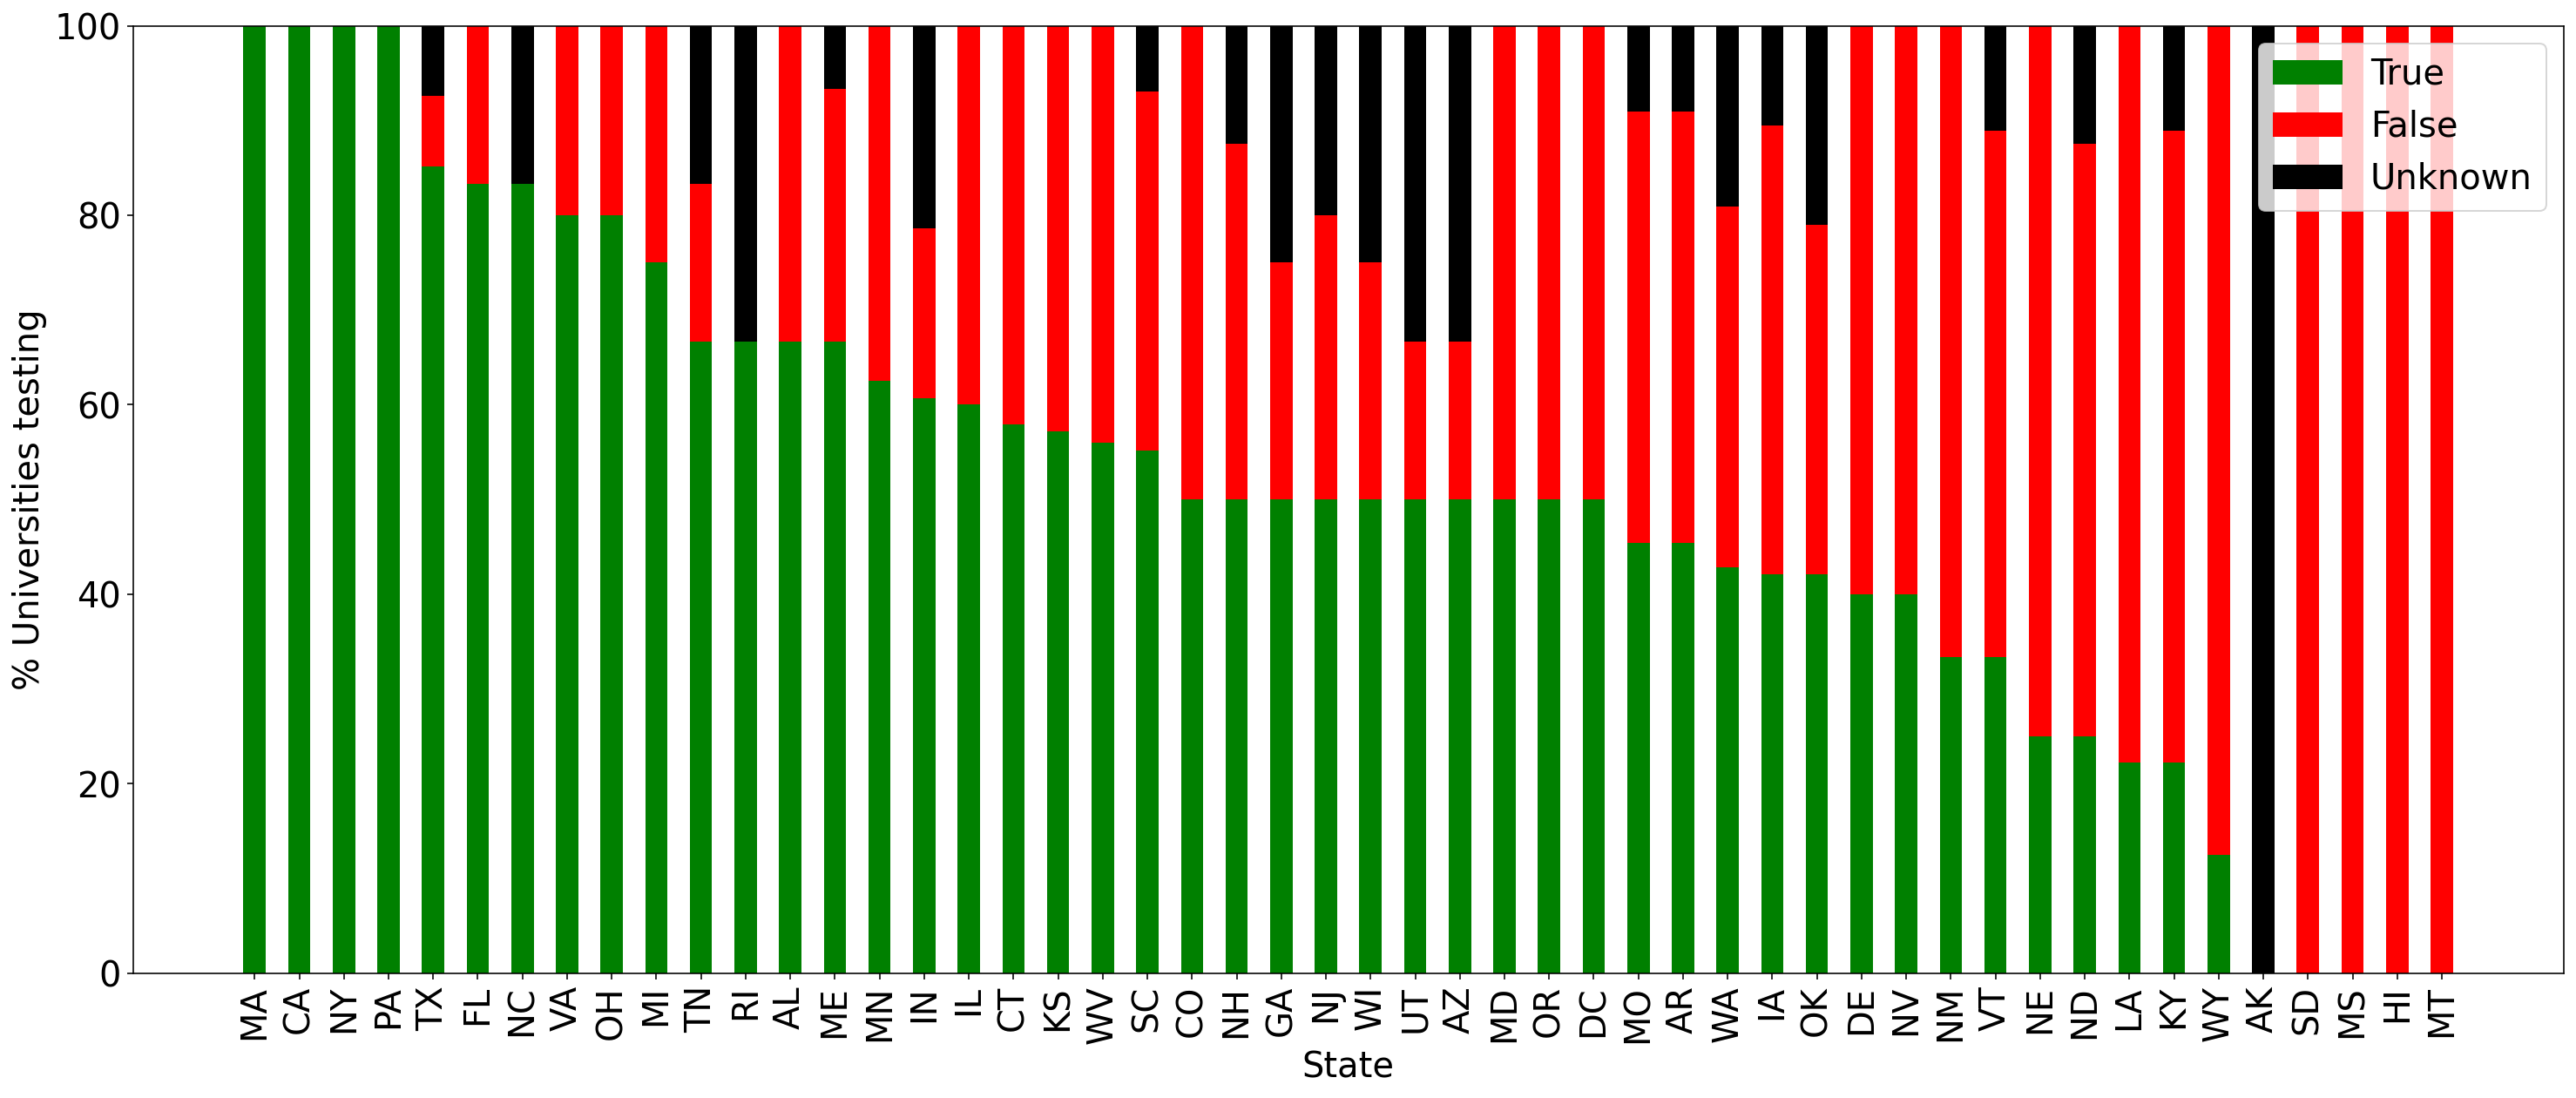

In [58]:
fig, ax = plt.subplots(figsize=(25,10))


ind = np.arange(v.shape[0])    # the x locations for the groups
labels = v.index.values
vp  = vp.sort_values(by="TRUE", ascending=False)

x = vp.TRUE.values
y = vp.FALSE.values
z = vp.Unknown.values

#width = 0.5     # the width of the bars: can also be len(x) sequence

ax.bar(ind, x, width,label="True", color="green")
ax.bar(ind, y, width, bottom=x, label="False", color="red")
ax.bar(ind, z, width, bottom=x+y, label="Unknown", color="black")

kwd = {
    "xticks" : ind,
    "xticklabels": labels,
    "xlabel": "State",
    "ylabel": "% Universities testing"
}
ax.set(**kwd)
ax.set_xticklabels(labels, rotation=90)
ax.legend()


fig.show()